Applying SVC, LinearSVC and SGD on a linearly separable dataset to observe their performance

In [1]:
from sklearn.datasets import load_iris
iris= load_iris(as_frame=True)
X= iris.data[["petal length (cm)","petal width (cm)"]][(iris.target==0)|(iris.target==1)]
Y = iris.target[(iris.target==0)|(iris.target==1)]

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


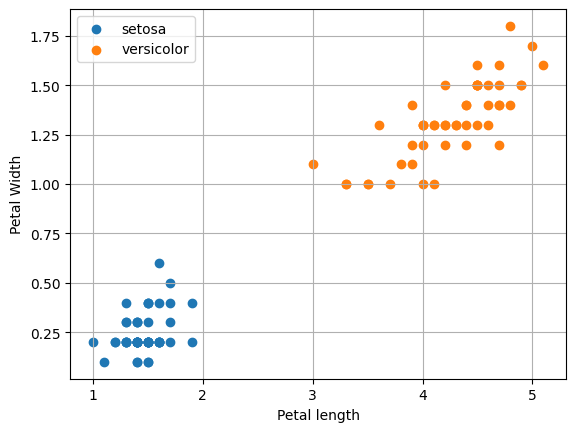

In [3]:
plt.scatter(X.values[:,0][Y==0],X.values[:,1][Y==0],label="setosa")
plt.scatter(X.values[:,0][Y==1],X.values[:,1][Y==1],label="versicolor")
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()
plt.show()

In the above plot we can see that the datasets are clearly linearly separable

In [53]:
trainx,testx,trainy,testy=train_test_split(X,Y,test_size=0.2)

1.0
1.0
1.0


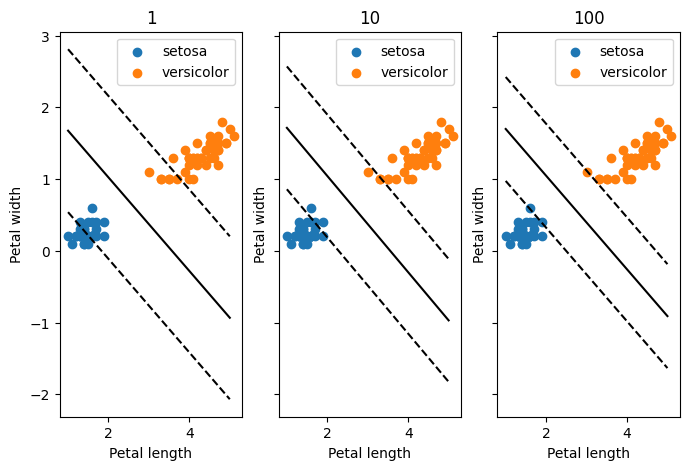

In [59]:
def plot_boundary(model,title):
    w=model.coef_[0]
    b=model.intercept_[0]
    x_new= np.linspace(1,5,500)
    decision_boundary=-w[0]/w[1]*x_new-b/w[1]
    margin = 1/w[1]
    plt.title(title)
    plt.scatter(trainx.values[:,0][trainy==0],trainx.values[:,1][trainy==0],label="setosa")
    plt.scatter(trainx.values[:,0][trainy==1],trainx.values[:,1][trainy==1],label="versicolor")
    plt.legend()
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.plot(x_new,decision_boundary,"k-")
    plt.plot(x_new,decision_boundary+margin,"k--")
    plt.plot(x_new,decision_boundary-margin,"k--")


fig,cols=plt.subplots(ncols=3,sharey=True,figsize=(8,5))

lsvc= LinearSVC(C=1)
lsvc.fit(trainx,trainy)
predy=lsvc.predict(testx)
print(accuracy_score(testy,predy))
plt.sca(cols[0])
plot_boundary(lsvc,"1")


lsvc= LinearSVC(C=10)
lsvc.fit(trainx,trainy)
predy=lsvc.predict(testx)
print(accuracy_score(testy,predy))
plt.sca(cols[1])
plot_boundary(lsvc,"10")


lsvc= LinearSVC(C=100)
lsvc.fit(trainx,trainy)
predy=lsvc.predict(testx)
print(accuracy_score(testy,predy))
plt.sca(cols[2])
plot_boundary(lsvc,"100")
plt.show()



in the above plot for different values for C we can clearly see a difference where C is a regularization parameter. As C reduces more instances are converted into support vectors so the model is more regularized but may lead to underfitting if too low.  As C increases, less instances are converted into support vectors so the model is less regularized but may lead to overfitting if too high. 
C=10 seems to be the best fit for the model

1.0
1.0
1.0


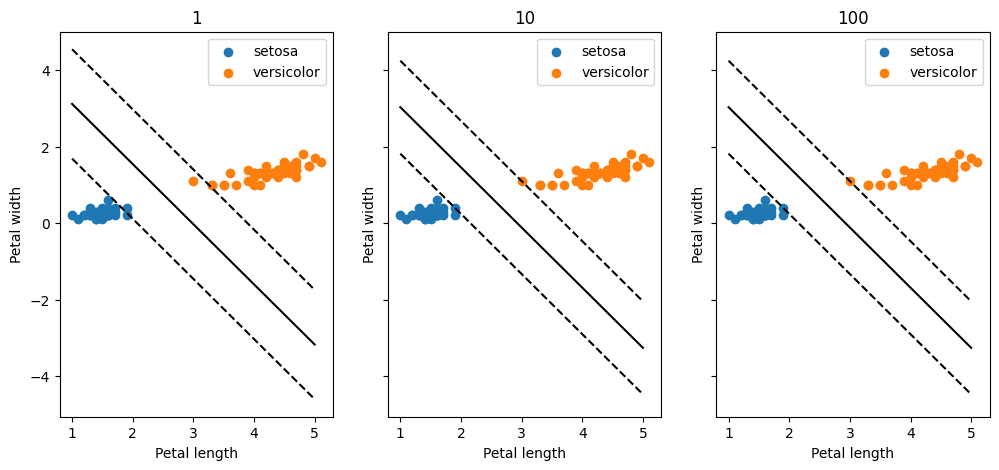

In [66]:

fig,cols=plt.subplots(ncols=3,sharey=True,figsize=(12,5))

svc= SVC(C=1,kernel="linear")
svc.fit(trainx,trainy)
predy=svc.predict(testx)
print(accuracy_score(testy,predy))
plt.sca(cols[0])
plot_boundary(svc,"1")


svc= SVC(C=10,kernel="linear")
svc.fit(trainx,trainy)
predy=svc.predict(testx)
print(accuracy_score(testy,predy))
plt.sca(cols[1])
plot_boundary(svc,"10")


svc= SVC(C=100,kernel="linear")
svc.fit(trainx,trainy)
predy=svc.predict(testx)
print(accuracy_score(testy,predy))
plt.sca(cols[2])
plot_boundary(svc,"100")
plt.show()


plt.show()

